In [75]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [76]:
# Reading the Given Dataset as a Pandas Dataframe.
df=pd.read_csv(r"C:\Users\user\Desktop\project\ELECTRIC VEHICLE SALES\Electric Vehicle Sales by State in India.csv")
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [77]:
df.shape

(96845, 8)

In [78]:
df.columns.unique()

Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')

In [79]:
df.columns

Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')

In [80]:
# below are the class of vehicles being sold in the Indian market.
df.Vehicle_Class.value_counts()

Vehicle_Class
MOTOR CAR                           4111
M-CYCLE/SCOOTER                     4101
GOODS CARRIER                       4096
MOTOR CAB                           3985
BUS                                 3813
                                    ... 
SEMI-TRAILER (COMMERCIAL)             18
X-RAY VAN                             12
MOTOR CYCLE/SCOOTER-WITH TRAILER       9
MODULAR HYDRAULIC TRAILER              3
MOTOR CARAVAN                          3
Name: count, Length: 73, dtype: int64

In [81]:
# Below are the category of vehicles being sold in Indian markets.
df.Vehicle_Category.value_counts()

Vehicle_Category
Others        54423
2-Wheelers    13121
3-Wheelers    11491
Bus            9119
4-Wheelers     8691
Name: count, dtype: int64

In [82]:
# Below are the types of vehicles being sold in Indian markets.
df.Vehicle_Type.value_counts()

Vehicle_Type
Others                54423
2W_Personal           11700
Bus                    7026
4W_Shared              4580
4W_Personal            4111
3W_Shared              3786
3W_Goods               3208
Institution Bus        2093
3W_Shared_LowSpeed     1951
3W_Goods_LowSpeed      1517
2W_Shared              1421
3W_Personal            1029
Name: count, dtype: int64

In [83]:
df.drop(columns=['Year']).describe()

,EV_Sales_Quantity
count,96845.000000
mean,37.108896
std,431.566675
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,20584.000000


In [84]:
#CheckingforDuplicatesandMissingValues.checkduplicates
checkduplicate=df.duplicated().sum()
print(checkduplicate)

0


In [85]:
checkmissingvalues=df.isnull().sum()
print(checkmissingvalues)

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


In [86]:
# Checking if the Datatypes are correct or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [87]:

df["Year"] = df["Year"].astype(int)

In [88]:
## The column Date is given as Object, but it should be in Datetime format
df["Date"]=pd.to_datetime(df["Date"],errors="coerce")

In [89]:
#Similarly converting other columns to their relevant datatypes.
categorical_columns = ["Month_Name", "State", "Vehicle_Class",
 "Vehicle_Category", "Vehicle_Type"]
df[categorical_columns]=df[categorical_columns].astype("category")

In [90]:
#Checking once again In [20]:
df.info() # now everything is well organised.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  int32         
 1   Month_Name         96845 non-null  category      
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  category      
 4   Vehicle_Class      96845 non-null  category      
 5   Vehicle_Category   96845 non-null  category      
 6   Vehicle_Type       96845 non-null  category      
 7   EV_Sales_Quantity  96845 non-null  float64       
dtypes: category(5), datetime64[ns](1), float64(1), int32(1)
memory usage: 2.3 MB


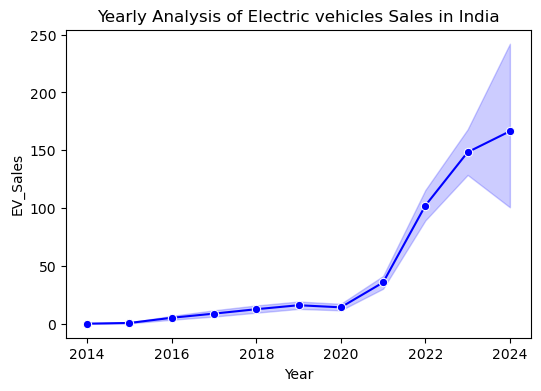

In [108]:
plt.figure(figsize=(6,4))
plt.title("Yearly Analysis of Electric vehicles Sales in India")
sns.lineplot(x="Year",y="EV_Sales_Quantity",data=df,marker="o",color="b")
plt.xlabel("Year")
plt.ylabel("EV_Sales");



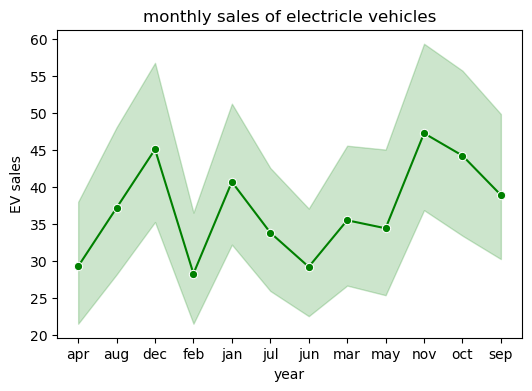

In [112]:
plt.figure(figsize=(6,4))
plt.title("monthly sales of electricle vehicles")
sns.lineplot(x="Month_Name",y="EV_Sales_Quantity",data=df,marker="o",color="g")
plt.xlabel("year")
plt.ylabel("EV sales");

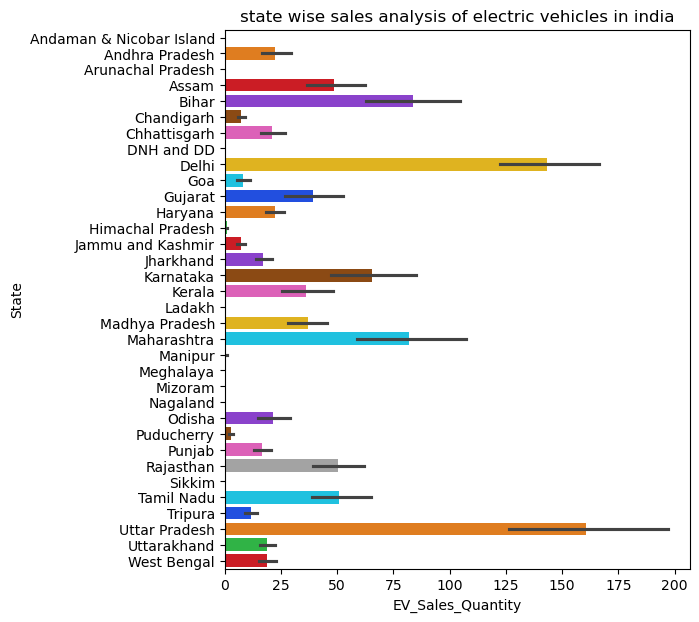

In [123]:
plt.figure(figsize=(6,7))
plt.title("state wise sales analysis of electric vehicles in india")
sns.barplot(y="State",x="EV_Sales_Quantity",data=df,hue="State",palette="bright")
plt.xlabel("EV_Sales_Quantity")
plt.ylabel("State");

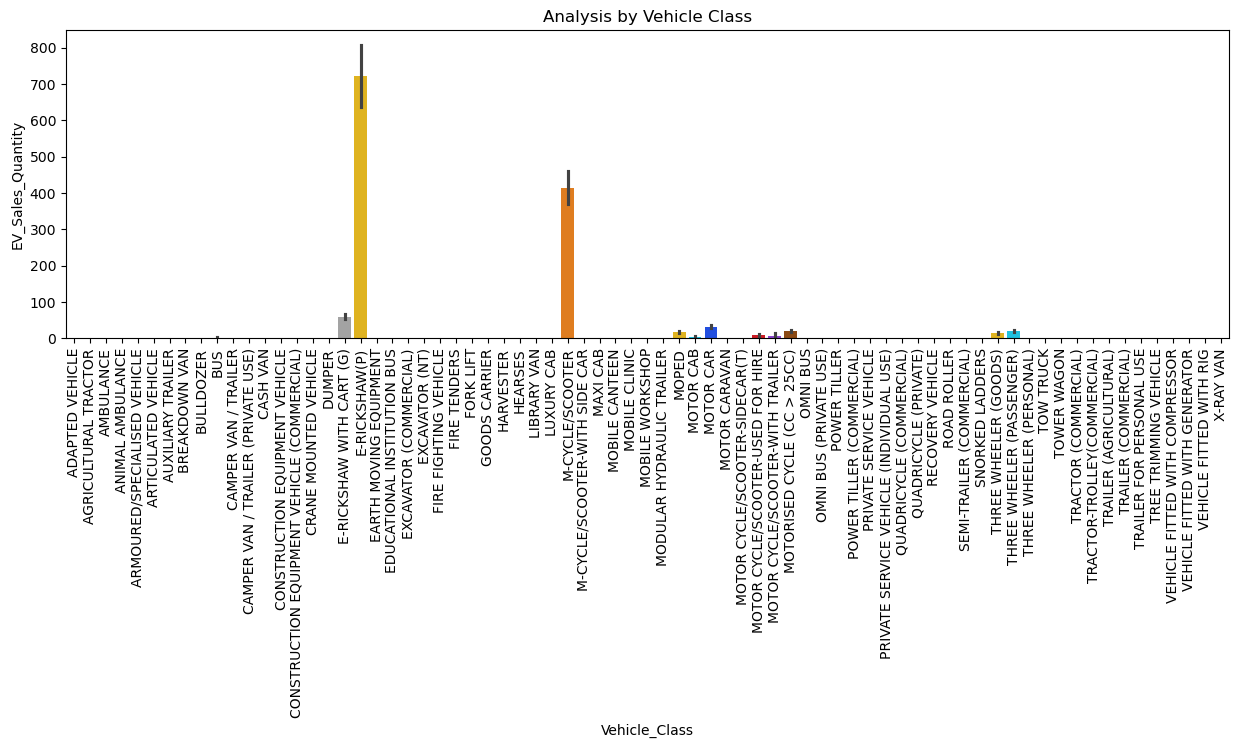

In [129]:
plt.figure(figsize=(15,4))
plt.title("Analysis by Vehicle Class")
sns.barplot(x="Vehicle_Class",y="EV_Sales_Quantity",data=df,hue="Vehicle_Class",palette="bright")
plt.xlabel("Vehicle_Class")
plt.ylabel("EV_Sales_Quantity")
plt.xticks(rotation=90);


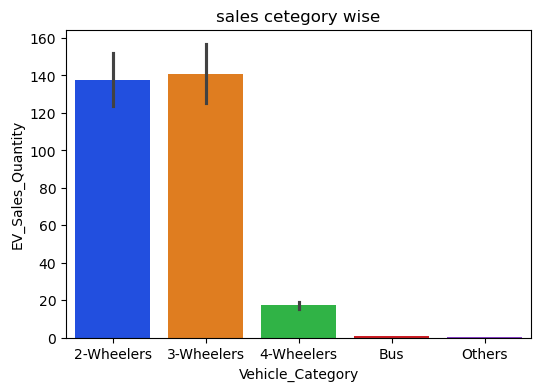

In [136]:
plt.figure(figsize=(6,4))
plt.title("sales cetegory wise")
sns.barplot(x="Vehicle_Category",y="EV_Sales_Quantity",data=df,hue="Vehicle_Category",palette="bright")
plt.xlabel("Vehicle_Category")
plt.ylabel("EV_Sales_Quantity")
plt.xticks(rotation=0);

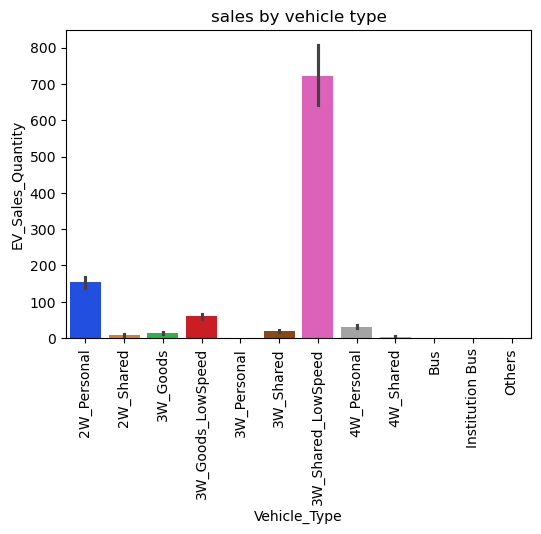

In [139]:
plt.figure(figsize=(6,4))
plt.title("sales by vehicle type")
sns.barplot(x="Vehicle_Type",y="EV_Sales_Quantity",data=df,hue="Vehicle_Type",palette="bright")
plt.xlabel("Vehicle_Type")
plt.ylabel("EV_Sales_Quantity")
plt.xticks(rotation=90);